<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET data from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
df = pd.read_csv(csv_file)
df.head()

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [44]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'no answer', regex=True)
df.head()

,Timestamp,Età in anni compiuti,Sesso,Cittadinanza,Sei nato in Italia?,Provincia di nascita,Provincia di dimora abituale,Titolo di Studio più alto conseguito,Cittadinanza del padre,Tuo padre è nato in Italia?,Provincia di nascita del padre,Cittadinanza della madre,Tua madre è nata in Italia?,Provincia di nascita della madre,Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?,Negli ultimi 12 mesi quante volte hai cercato informazioni?,"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Carta (es. giornali, riviste, ecc.)]","Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Tv (es. telegiornali, talkshow)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Radio (es. giornaleradio)],"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Persone (amici, scuola, famiglia)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Internet],Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Altro],"Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare?","Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?",Quali notizie ti fanno paura?,Con che frequenza ti informi su argomenti riguardanti la scienza?,Quali argomenti scientifici ti attirano di più,"Quando hai saputo della strage in discoteca a Corinaldo al concerto di Sfera Ebbasta, cosa ha catturato la tua attenzione?",Da dove hai appreso della caduta del ponte Morandi a Genova?,Hai mai usato internet?,"Sul web, dove prendi le informazioni? [testate giornalistiche online]","Sul web, dove prendi le informazioni? [social]","Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]","Sul web, dove prendi le informazioni? [siti specifici che conosco]","Sul web, dove prendi le informazioni? [app dedicate]","Sul web, dove prendi le informazioni? [newsletter via email]",Quali social usi di più per informarti?,"Tra i social che usi di più anche per informati, quale preferisci?",Cosa cerchi di più su internet?,Qual è la prima cosa che vai a vedere sui social?,Da dove ricevi notizie senza cercarle quando sei on line?,Quali argomenti ti vengono suggeriti mentre sei online,Cosa attrae innanzitutto la tua attenzione su una notizia on line?,Condividi le notizie?,Con chi le condividi?,Come condividi le notizie che leggi?,Quando condividi lo fai ... [Perché è una notizia che mi ha impressionato],Quando condividi lo fai ... [Per farlo sapere a tutti],Quando condividi lo fai ... [Per commentare],Quando condividi lo fai ... [Perché lo fanno tutti],Secondo te ci si può fidare di ciò che scrivono i giornalisti?,Secondo te ci si può fidare delle notizie che si trovano su internet?,Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?,"Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta]",Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento],Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia],"Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)]",Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile],Cosa ti fa capire se una notizia è attendibile? [altro],Secondo te dove si diffondono di più le fake news?,Quali sono gli argormenti fake che attecchiscono di più?,Secondo te a che età si è più inclini a condividere una fake news?,Sai cos'è la reputazione digitale?,Sai quali pericoli potrebbero esserci nel postare le foto sui social?
0,4/1/2019 19:34:25,tra 35 e 44,F,italiana,no answer,Roma,Roma,scuola primaria,italiana,no answer,Belluno,italiana,no answer,Asti,Sì,Meno di una volta al mese,raramente,raramente,raramente,raramente,raramente,raramente,Radio,circa 30 minuti,bullismo,gio

# Look into data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 64 columns):
Timestamp                                                                                                                     1014 non-null object
Età in anni compiuti                                                                                                          1014 non-null object
Sesso                                                                                                                         1014 non-null object
Cittadinanza                                                                                                                  1014 non-null object
Sei nato in Italia?                                                                                                           1014 non-null object
Provincia di nascita                                                                                                          1014 non-null object
Provincia d

In [46]:
df.describe()

,Timestamp,Età in anni compiuti,Sesso,Cittadinanza,Sei nato in Italia?,Provincia di nascita,Provincia di dimora abituale,Titolo di Studio più alto conseguito,Cittadinanza del padre,Tuo padre è nato in Italia?,Provincia di nascita del padre,Cittadinanza della madre,Tua madre è nata in Italia?,Provincia di nascita della madre,Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?,Negli ultimi 12 mesi quante volte hai cercato informazioni?,"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Carta (es. giornali, riviste, ecc.)]","Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Tv (es. telegiornali, talkshow)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Radio (es. giornaleradio)],"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Persone (amici, scuola, famiglia)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Internet],Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Altro],"Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare?","Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?",Quali notizie ti fanno paura?,Con che frequenza ti informi su argomenti riguardanti la scienza?,Quali argomenti scientifici ti attirano di più,"Quando hai saputo della strage in discoteca a Corinaldo al concerto di Sfera Ebbasta, cosa ha catturato la tua attenzione?",Da dove hai appreso della caduta del ponte Morandi a Genova?,Hai mai usato internet?,"Sul web, dove prendi le informazioni? [testate giornalistiche online]","Sul web, dove prendi le informazioni? [social]","Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]","Sul web, dove prendi le informazioni? [siti specifici che conosco]","Sul web, dove prendi le informazioni? [app dedicate]","Sul web, dove prendi le informazioni? [newsletter via email]",Quali social usi di più per informarti?,"Tra i social che usi di più anche per informati, quale preferisci?",Cosa cerchi di più su internet?,Qual è la prima cosa che vai a vedere sui social?,Da dove ricevi notizie senza cercarle quando sei on line?,Quali argomenti ti vengono suggeriti mentre sei online,Cosa attrae innanzitutto la tua attenzione su una notizia on line?,Condividi le notizie?,Con chi le condividi?,Come condividi le notizie che leggi?,Quando condividi lo fai ... [Perché è una notizia che mi ha impressionato],Quando condividi lo fai ... [Per farlo sapere a tutti],Quando condividi lo fai ... [Per commentare],Quando condividi lo fai ... [Perché lo fanno tutti],Secondo te ci si può fidare di ciò che scrivono i giornalisti?,Secondo te ci si può fidare delle notizie che si trovano su internet?,Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?,"Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta]",Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento],Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia],"Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)]",Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile],Cosa ti fa capire se una notizia è attendibile? [altro],Secondo te dove si diffondono di più le fake news?,Quali sono gli argormenti fake che attecchiscono di più?,Secondo te a che età si è più inclini a condividere una fake news?,Sai cos'è la reputazione digitale?,Sai quali pericoli potrebbero esserci nel postare le foto sui social?
count,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,10

In [47]:
print(df['Cittadinanza'].value_counts())
print(df['Sei nato in Italia?'].value_counts())

italiana    977
europea      21
altra        16
Name: Cittadinanza, dtype: int64
Sì           952
no answer     39
No            23
Name: Sei nato in Italia?, dtype: int64


# do same dataset visualizzation

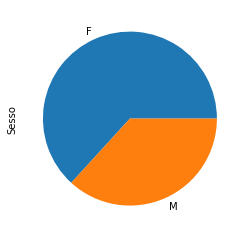

F    641
M    373
Name: Sesso, dtype: int64

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

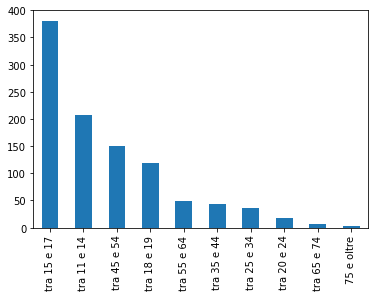

tra 15 e 17    381
tra 11 e 14    208
tra 45 e 54    150
tra 18 e 19    119
tra 55 e 64     49
tra 35 e 44     44
tra 25 e 34     36
tra 20 e 24     17
tra 65 e 74      6
75 e oltre       4
Name: Età in anni compiuti, dtype: int64

In [49]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 
df['Età in anni compiuti'].value_counts()

data are index in ASCI oder and must be reindex 

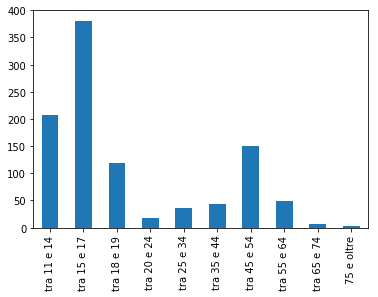

In [50]:
ordine = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine).plot(kind='bar')
plt.show() 

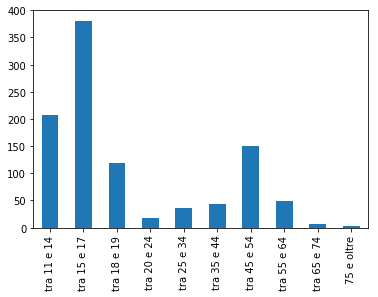

In [51]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

In [0]:

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine])
#ordinal_encoder = OrdinalEncoder()
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])
#print (ordinal_encoder.get_params)

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

[array(['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19', 'tra 20 e 24',
       'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54', 'tra 55 e 64',
       'tra 65 e 74', '75 e oltre'], dtype=object)]


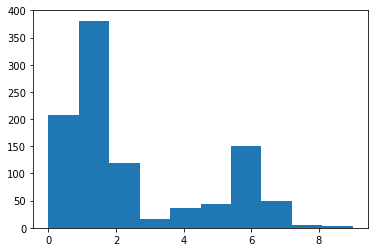

In [73]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

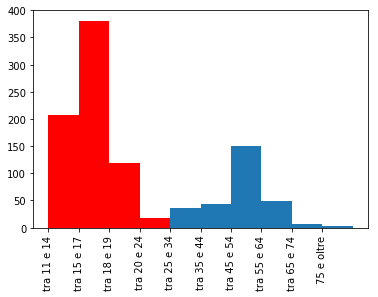

In [78]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,10), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,10), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine, rotation='vertical')
plt.show()
#print(ordinal_encoder.categories_[0])


istogrammi di tutti il dataset

Età in anni compiuti


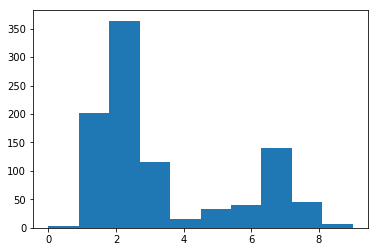

Sesso


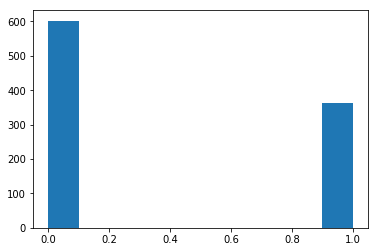

Cittadinanza


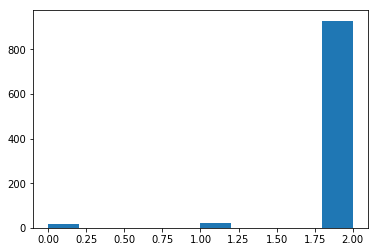

Sei nato in Italia?


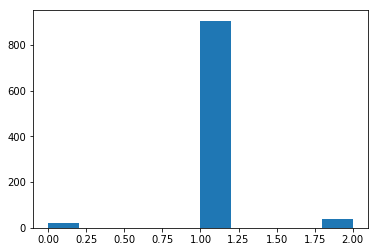

Provincia di nascita


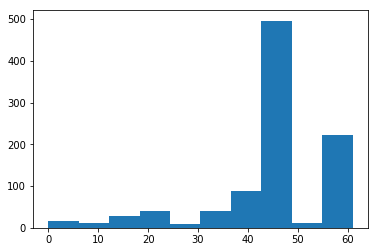

Provincia di dimora abituale


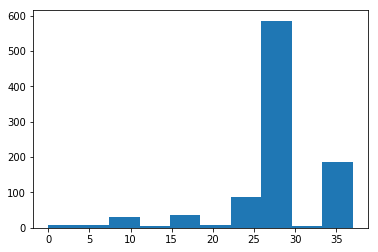

Titolo di Studio più alto conseguito


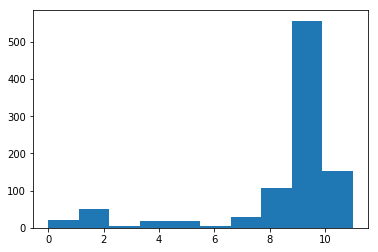

Cittadinanza del padre


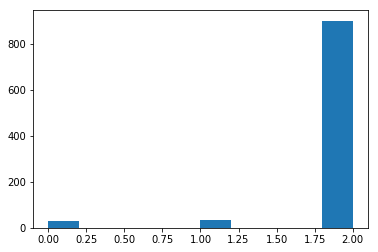

Tuo padre è nato in Italia?


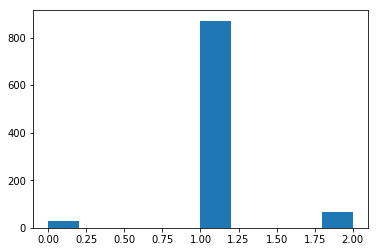

Provincia di nascita del padre


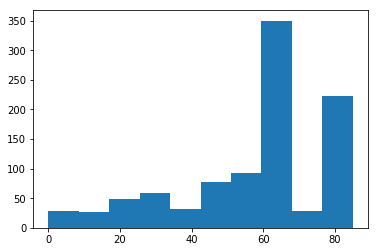

Cittadinanza della madre


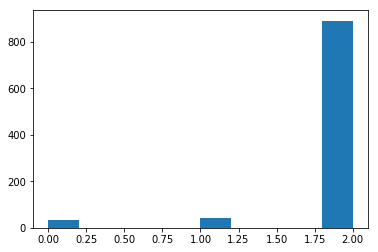

Tua madre è nata in Italia?


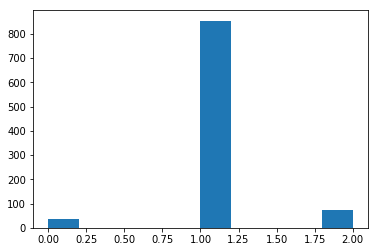

Provincia di nascita della madre


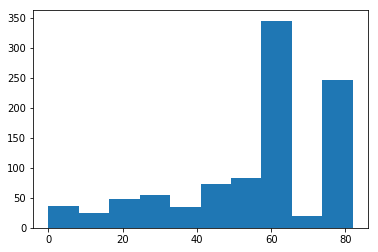

Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?


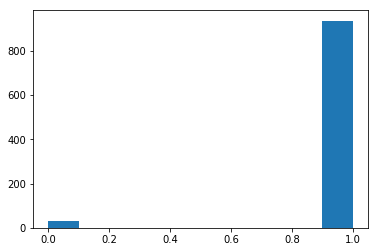

Negli ultimi 12 mesi quante volte hai cercato informazioni?


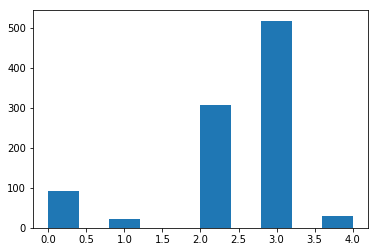

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)]


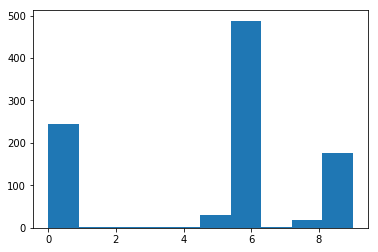

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)]


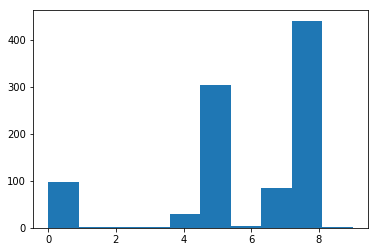

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)]


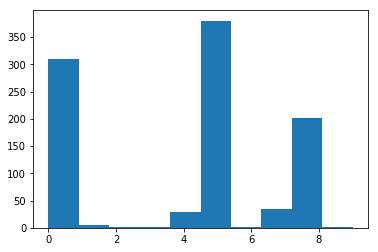

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)]


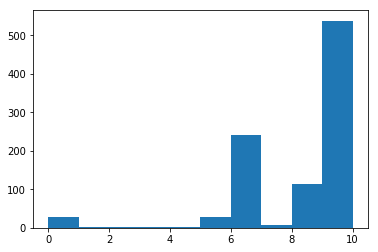

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet]


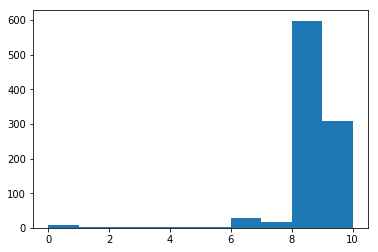

Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro]


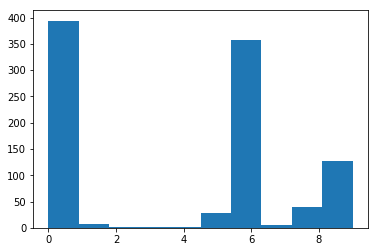

Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? 


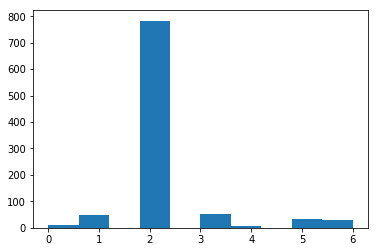

Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?


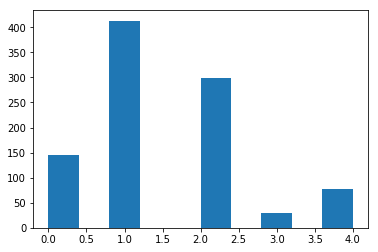

Quali notizie ti fanno paura?


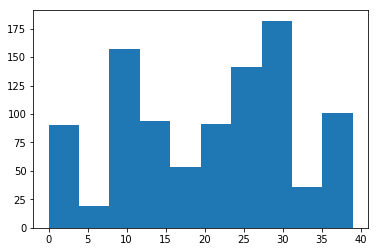

Con che frequenza ti informi su argomenti riguardanti la scienza?


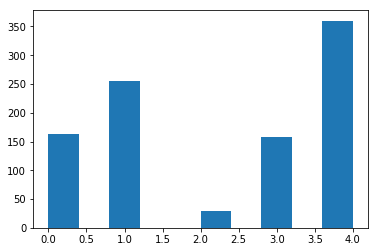

Quali argomenti scientifici ti attirano di più


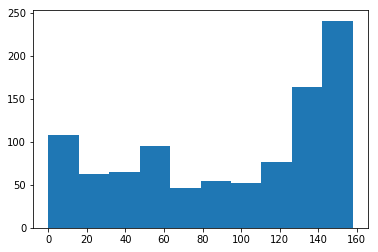

Quando hai saputo della strage in discoteca a Corinaldo al concerto di Sfera Ebbasta, cosa ha catturato la tua attenzione?


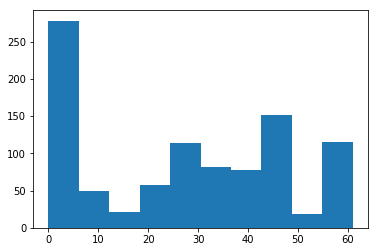

Da dove hai appreso della caduta del ponte Morandi a Genova?


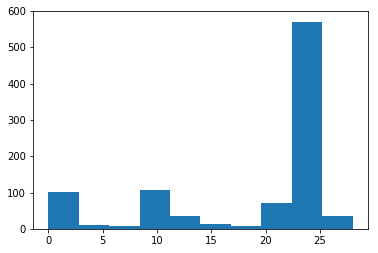

Hai mai usato internet?


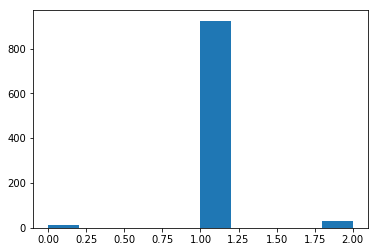

Sul web, dove prendi le informazioni? [testate giornalistiche online]


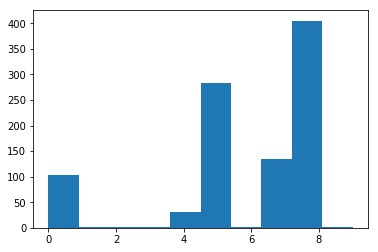

Sul web, dove prendi le informazioni? [social]


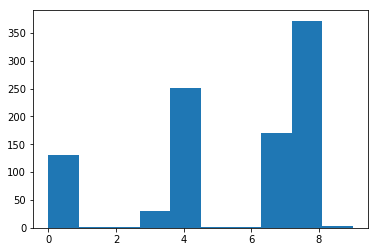

Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]


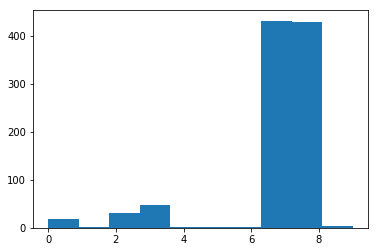

Sul web, dove prendi le informazioni? [siti specifici che conosco]


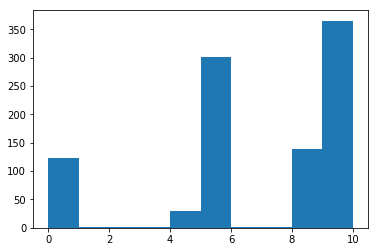

Sul web, dove prendi le informazioni? [app dedicate]


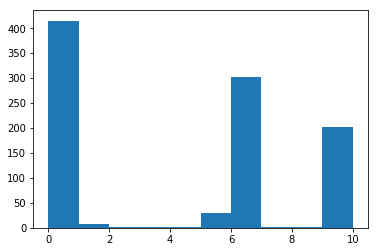

Sul web, dove prendi le informazioni? [newsletter via email]


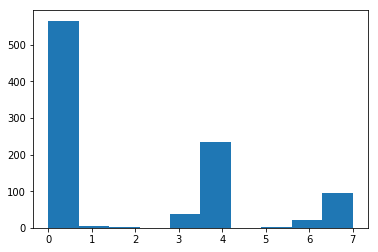

Quali social usi di più per informarti?


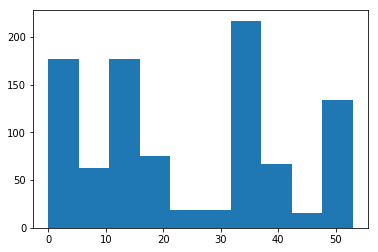

Tra i social che usi di più anche per informati, quale preferisci?


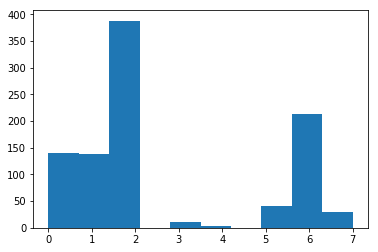

Cosa cerchi di più su internet?


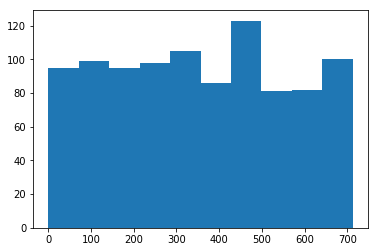

Qual è la prima cosa che vai a vedere sui social?


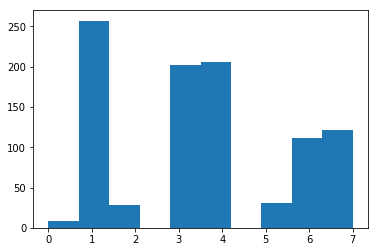

Da dove ricevi notizie senza cercarle quando sei on line? 


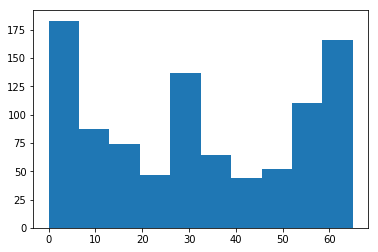

Quali argomenti ti vengono suggeriti mentre sei online


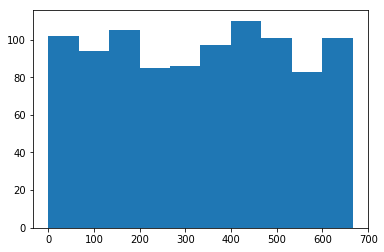

Cosa attrae innanzitutto la tua attenzione su una notizia on line?


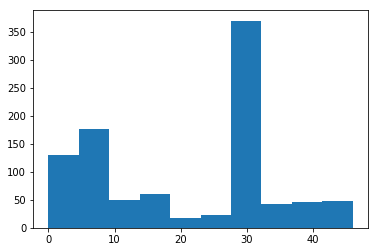

Condividi le notizie?


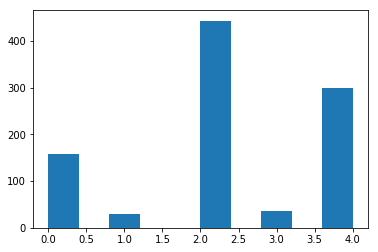

Con chi le condividi?


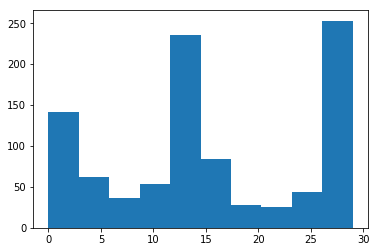

Come condividi le notizie che leggi? 


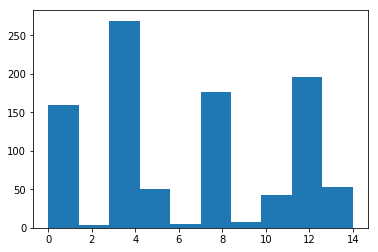

Quando condividi lo fai ...  [Perché è una notizia che mi ha impressionato]


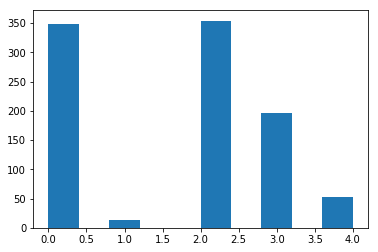

Quando condividi lo fai ...  [Per farlo sapere a tutti]


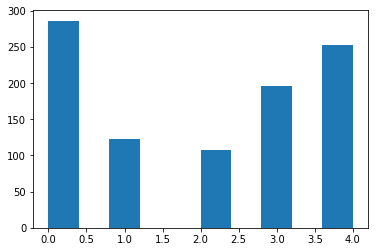

Quando condividi lo fai ...  [Per commentare]


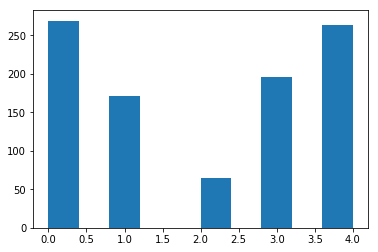

Quando condividi lo fai ...  [Perché lo fanno tutti]


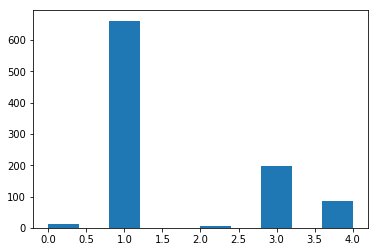

Secondo te ci si può fidare di ciò che scrivono i giornalisti?


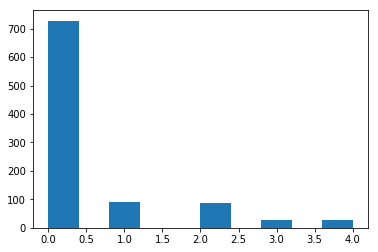

Secondo te ci si può fidare delle notizie che si trovano su internet?


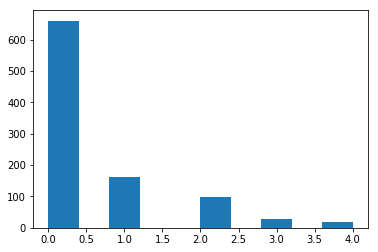

Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?


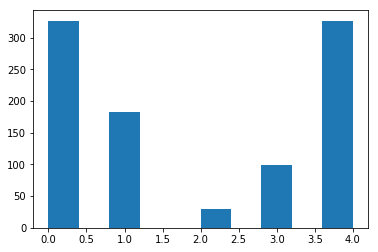

Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta]


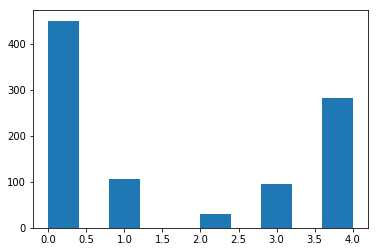

Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento]


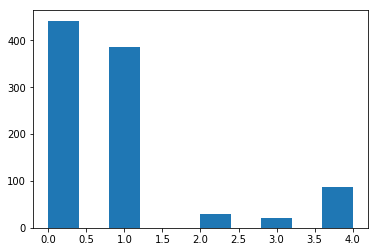

Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia]


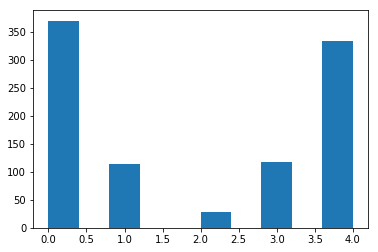

Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)]


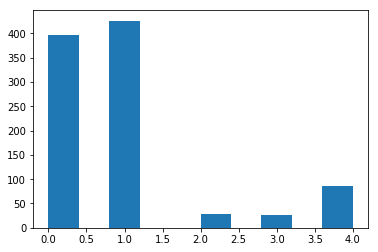

Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile]


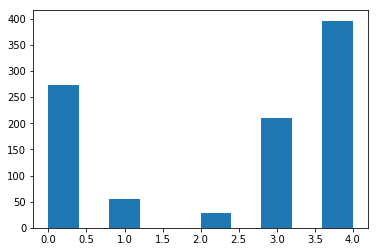

Cosa ti fa capire se una notizia è attendibile? [altro]


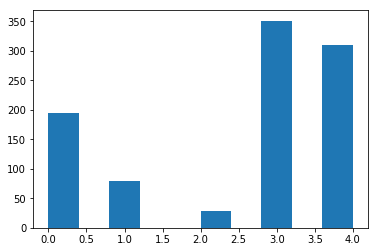

Secondo te dove si diffondono di più le fake news?


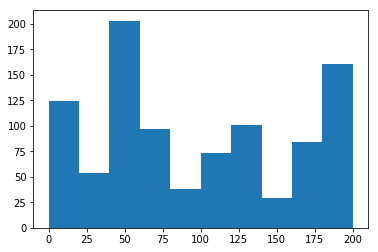

Quali sono gli argormenti fake che attecchiscono di più? 


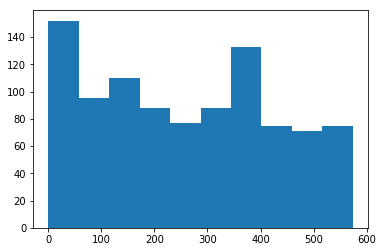

Secondo te a che età si è più inclini a condividere una fake news?


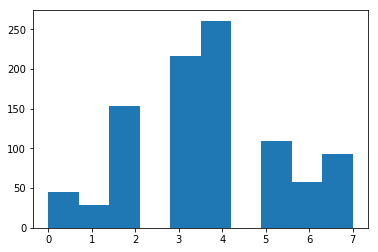

Sai cos'è la reputazione digitale?


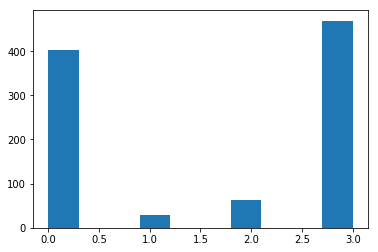

Sai quali pericoli potrebbero esserci nel postare le foto sui social?


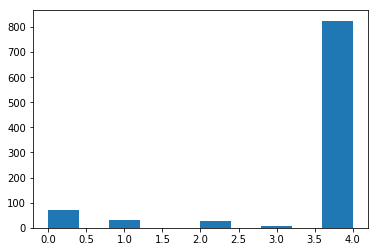

In [7]:
for i in range (1, len(df.columns)):
  print (df1.columns[i])

#  df[df.columns[i]].value_counts().plot(kind='bar')
  ordinal_encoder = OrdinalEncoder()
  ordinated_encoded = ordinal_encoder.fit_transform(df1[[df1.columns[i]]])
  plt.hist(ordinated_encoded)
  plt.show()

In [15]:
df.values

array([['4/1/2019 19:34:25', 'tra 35 e 44', 'F', ..., 'sopra i 50',
        'non mi interessa', 'lo so, ma non mi interessa'],
       ['4/1/2019 19:47:19', 'tra 55 e 64', 'F', ..., 'sopra i 50', 'si',
        'si'],
       ['4/2/2019 15:32:41', 'tra 45 e 54', 'M', ..., 'tra 41 e 50',
        'no', 'no'],
       ...,
       ['5/23/2019 11:09:28', 'tra 15 e 17', 'F', ..., 'tra 10 e 14',
        'no', 'si'],
       ['5/23/2019 11:57:16', 'tra 15 e 17', 'M', ..., 'sopra i 50',
        'si', 'si'],
       ['5/23/2019 12:04:50', 'tra 15 e 17', 'F', ..., 'tra 21 e 30',
        'no', 'lo so, ma non mi interessa']], dtype=object)

In [14]:
np.array(df.get_values()).hist(bins=50, figsize=(20,15))
plt.show()

AttributeError: ignored